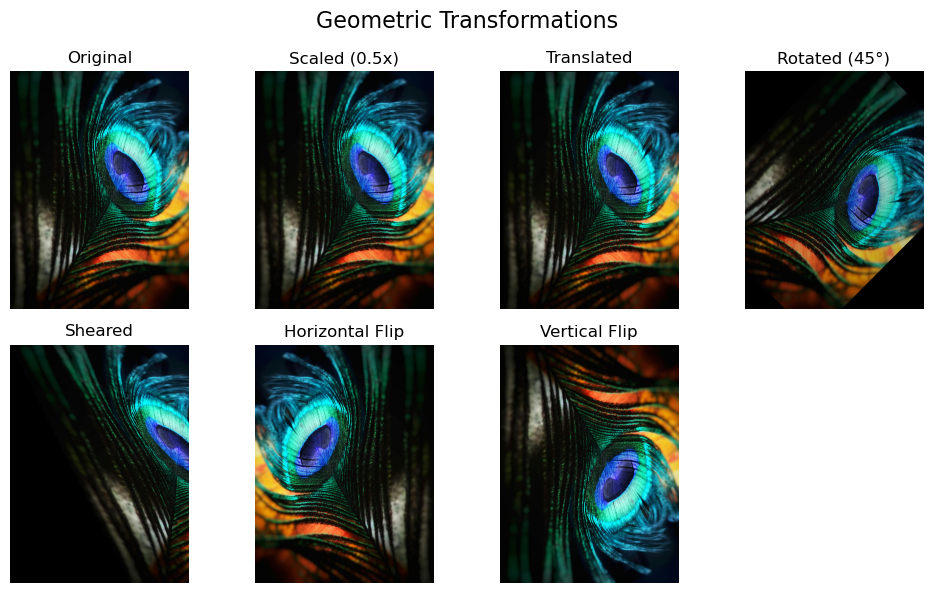

(3968, 2976, 3)
(1984, 1488, 3)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image


# MANUAL IMPLEMENTATION


def geometric_transformations(image_path):

    # PIL  so  OPENCV  is not  used
    img = Image.open(image_path)
    img = np.array(img)
    
    # Get image dimensions
    height, width = img.shape[:2]
    
    # 1. Scaling
    scale_factor = 0.5
    scaled = np.array(Image.fromarray(img).resize((int(width * scale_factor), int(height * scale_factor))))
    
    # 2. Translation
    tx, ty = 50, 30  # translate by 50 pixels right and 30 pixels down
    translated = np.zeros_like(img)
    for i in range(height):
        for j in range(width):
            if 0 <= i - ty < height and 0 <= j - tx < width:
                translated[i, j] = img[i - ty, j - tx]
    
    # 3. Rotation
    angle = 45  # rotate by 45 degrees
    angle_rad = np.radians(angle)
    center_x, center_y = width // 2, height // 2
    rotated = np.zeros_like(img)
    
    for i in range(height):
        for j in range(width):
            # Translate point to origin
            x = j - center_x
            y = i - center_y
            # Apply rotation
            new_x = int(center_x + x * np.cos(angle_rad) - y * np.sin(angle_rad))
            new_y = int(center_y + x * np.sin(angle_rad) + y * np.cos(angle_rad))
            # Check if within bounds
            if 0 <= new_x < width and 0 <= new_y < height:
                rotated[new_y, new_x] = img[i, j]

    
    # 4. Shearing
    shear_matrix = np.array([[1, 0.5], [0, 1]])  # shear along x-axis
    sheared = np.zeros_like(img)
    
    for i in range(height):
        for j in range(width):
            # Apply shear
            new_x = int(j + shear_matrix[0, 1] * i)
            new_y = i
            # Check if within bounds
            if 0 <= new_x < width and 0 <= new_y < height:
                sheared[new_y, new_x] = img[i, j]

    
    # 5. Reflection (Flipping)
    # Horizontal flip
    horizontal_flip = np.flip(img, axis=1)
    # Vertical flip
    vertical_flip = np.flip(img, axis=0)
    
    # Create subplot layout
    fig, axes = plt.subplots(2, 4, figsize=(10, 6))
    fig.suptitle('Geometric Transformations', fontsize=16)
    
    # Plot all transformations
    axes[0, 0].imshow(img, cmap='gray')
    axes[0, 0].set_title('Original')
    
    axes[0, 1].imshow(scaled, cmap='gray')
    axes[0, 1].set_title(f'Scaled ({scale_factor}x)')
    
    axes[0, 2].imshow(translated,  cmap='gray')
    axes[0, 2].set_title('Translated')
    
    axes[0, 3].imshow(rotated, cmap='gray')
    axes[0, 3].set_title('Rotated (45°)')
    
    axes[1, 0].imshow(sheared, cmap='gray')
    axes[1, 0].set_title('Sheared')
    
    axes[1, 1].imshow(horizontal_flip, cmap='gray')
    axes[1, 1].set_title('Horizontal Flip')
    
    axes[1, 2].imshow(vertical_flip, cmap='gray')
    axes[1, 2].set_title('Vertical Flip')
    
    # Remove extra subplot
    axes[1, 3].remove()
    
    # Remove axes ticks
    for ax in axes.flat:
        if ax._position:  # Check if subplot exists
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

    print(img.shape)
    print(scaled.shape)

if __name__ == "__main__":
    image_path = r"MainImage.jpg"
    geometric_transformations(image_path)